In [4]:
import torch
import numpy as np
from torch.utils.data import DataLoader

from attrbench.functional.insertion_deletion import _insertion_deletion
from attrbench.lib import PixelMaskingPolicy
from experiments.lib.util import get_ds_model, get_n_pixels, get_methods
from experiments.test.util import imshow, attrshow, show_img_attrs

import torch
from experiments.general_imaging.dataset_models import get_dataset_model
from experiments.lib import get_methods
from torch.utils.data import DataLoader


# Initialization and parameters

In [5]:
BATCH_SIZE = 4
DATASET = "CIFAR10"
MODEL = "resnet18"
METHOD = "IntegratedGradients"
MODE = "deletion"

device = "cuda" if torch.cuda.is_available() else "cpu"
dataset, model = get_ds_model(DATASET, MODEL)
methods = get_methods(model, aggregation_fn="avg", normalize=False, methods=[METHOD],
                      batch_size=BATCH_SIZE, sample_shape=dataset.sample_shape[-2:])
pmp = PixelMaskingPolicy(0.)
method = methods[METHOD]
model.to(device)
for param in model.parameters():
    param.requires_grad = False
model.eval()
n_pixels = get_n_pixels(DATASET)
mask_range = list(np.rint(np.linspace(0, 1, 5) * n_pixels).astype(np.int))

<function attrbench.functional.insertion_deletion._insertion_deletion(samples: torch.Tensor, labels: torch.Tensor, model: Callable, method: Callable, mask_range: List[int], masking_policy: attrbench.lib.masking_policy.MaskingPolicy, mode: str, debug_mode=False)>

# Run Insertion/Deletion Curves

In [6]:
batch, labels = next(iter(DataLoader(dataset, BATCH_SIZE, num_workers=4, shuffle=True)))
batch = batch.to(device)
labels = labels.to(device)
result, debug_data = _insertion_deletion(batch, labels, model, method, mask_range, pmp, mode=MODE, debug_mode=True)

# Plot results

## Plot the original samples and their attributions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


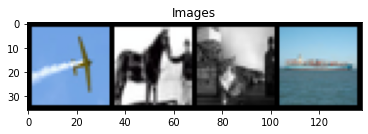

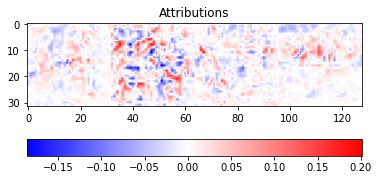

In [7]:
show_img_attrs(dataset.denormalize(batch), debug_data["attrs"])

## Plot perturbed samples and values for each perturbation step

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


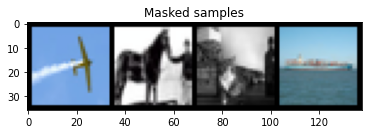

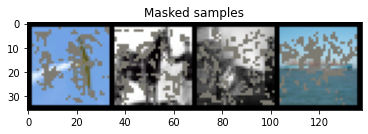

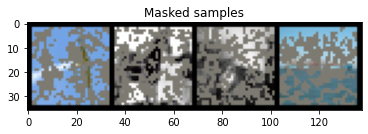

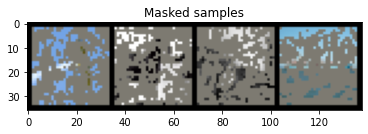

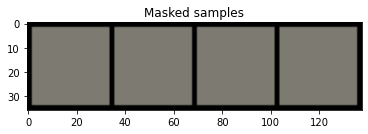

In [8]:
for n_idx, masked_samples in enumerate(debug_data["masked_samples"]):
    imshow(dataset.denormalize(masked_samples), title="Masked samples")

In [9]:
debug_data

{'attrs': tensor([[[[-6.2454e-03, -1.7243e-02, -1.1312e-02,  ...,  3.0424e-03,
             1.6388e-02,  2.0959e-02],
           [-8.1022e-03, -1.6614e-02, -1.0579e-03,  ...,  2.0659e-03,
             1.2920e-02,  2.9116e-02],
           [ 1.6056e-03,  1.4347e-02,  3.2504e-02,  ..., -9.1812e-04,
            -7.8576e-04,  1.9561e-02],
           ...,
           [-1.5052e-03,  3.0802e-03,  6.7327e-03,  ..., -5.9750e-03,
             1.7523e-03,  5.3501e-03],
           [ 9.4602e-03,  6.4486e-03, -2.6998e-03,  ...,  2.0239e-03,
             3.8261e-03,  5.1226e-03],
           [ 9.1852e-03,  5.3877e-03, -1.5270e-03,  ...,  7.5705e-03,
             8.7341e-03,  3.6527e-03]]],
 
 
         [[[-3.4075e-02,  6.9019e-03, -2.4938e-02,  ..., -1.6434e-02,
            -1.3492e-02, -2.3527e-03],
           [ 2.8458e-02,  5.9661e-02,  3.3395e-02,  ..., -8.0993e-03,
             5.2111e-03,  1.7132e-05],
           [ 9.5732e-03, -8.2983e-02, -3.7385e-02,  ...,  1.3069e-02,
             1.9636e-02,  3